Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

Roshni's Scratch Notebook

# I. Cleaning The Numbers Dataset

## 1. Import packages & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

## 2. Remove unnecessary column (ID)

In [2]:
tn_df = tn_df.drop('id', axis=1)
tn_df = tn_df.drop('domestic_gross', axis = 1)

## 3. Convert Number Variables to Int type

In [4]:
tn_df['production_budget'].replace(',','', regex=True, inplace=True)
tn_df['production_budget'] = tn_df['production_budget'].map(lambda x: x.replace('$',''))

tn_df['worldwide_gross'].replace(',','', regex=True, inplace=True)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].map(lambda x: x.replace('$',''))

tn_df['production_budget'] = tn_df['production_budget'].astype(int)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(int)

tn_df

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5777,2018-12-31,Red 11,7000,0
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338
5780,2015-09-29,A Plague So Pleasant,1400,0


## 4. Excluding Worldwide Gross == 0 
- Worldwide Gross of 0 indicates that either the data is missing data or the movie was never released in theaters.

In [5]:
print("Excluding worldwide gross of $0 would remove " + str(round((1 - 5415/5781)*100, 1)) + " percent of datapoints")

#Less than 10% of data is being removed, which meets the rule of thumb


tn_df = tn_df[tn_df['worldwide_gross'] != 0]

tn_df

Excluding worldwide gross of $0 would remove 6.3 percent of datapoints


,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644
5776,2004-12-31,The Mongol King,7000,900
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338


## 5. Calculate Net Profit as a new variable in dataset

In [6]:
# Net profit = worldwide gross - production budget


tn_df = tn_df.assign(net_profit = tn_df['worldwide_gross'] - tn_df['production_budget'])

tn_df

,release_date,movie,production_budget,worldwide_gross,net_profit
0,2009-12-18,Avatar,425000000,2776345279,2351345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747
...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644,64644
5776,2004-12-31,The Mongol King,7000,900,-6100
5778,1999-04-02,Following,6000,240495,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,-3662


## 6. Convert Gross, Profit & Budget to "in millions" to make graphs more readable

In [7]:
tn_df['budget_mils'] = tn_df['production_budget'] / 1000000
tn_df['profit_mils'] = tn_df['net_profit']/1000000
tn_df['worldwide_gross_mils'] = tn_df['worldwide_gross']/1000000

# II. Relationship between Production Budget and Global Net Profit

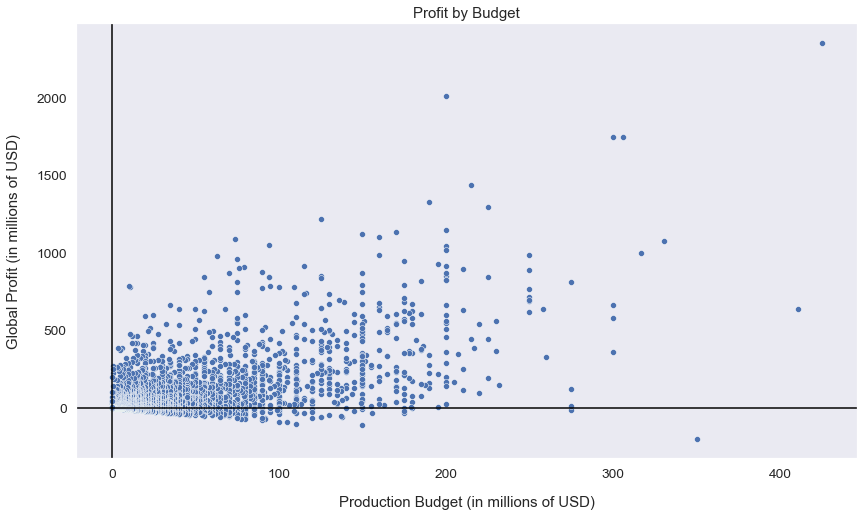

In [91]:
sns.set_theme(context='notebook', style='dark', palette='deep', font='sans-serif', font_scale=1.25, color_codes=True, rc={'figure.figsize':(14,8)})

plot = sns.scatterplot(x='budget_mils', y='profit_mils', data=tn_df)
plt.axvline(0, color='black')
plt.axhline(0, color='black')

plot.set_title('Profit by Budget')
plot.set_xlabel('Production Budget (in millions of USD)', rotation=0, labelpad=15)
plot.set_ylabel('Global Profit (in millions of USD)', rotation=90, labelpad=15);

plt.show()

### Examining Correlation

In [94]:
r_budget_profit = tn_df.corr()['production_budget']['net_profit']

print("r = " + str(round(r_budget_profit, 2)))

r = 0.61


- Our scatter plot and Pearson's correlation (r = 0.61) suggests a moderately strong relationship between production budget and profit. 

- From the scatterplot, we determined that high-budget films are high-risk, high-reward. While there is a general positive relationship between budget and profit, there is more variability among higher-budget films. 

- This brought us to the question: is it worth the risk to invest in high-budget movies, or better to invest in more low-budget movies?

# III. Budget-Profit Relationship in Low, Medium and High Budget Movies

- Economic researchers define "low" "medium" and "high" budget movies in Hollywood as the following (Kuehn & Lampe, 2021; https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3751648):
  - Low = 0 - 20 mil, 
  - Medium = 20 - 100 mil
  - High = 100+ mil
  
- Below, we group the dataset into "Low" "Medium" and "High" budget movies based on the above cutoffs:

In [21]:
np.percentile(tn_df['budget_mils'], 25)

6.0

In [25]:
labels = ["Low", "Medium", "High"]

tn_df['budget_groups'] = pd.cut(tn_df['budget_mils'], bins=[0,20,100,500],include_lowest=True, labels=labels)

tn_df

,release_date,movie,production_budget,worldwide_gross,net_profit,budget_mils,profit_mils,worldwide_gross_mils,budget_groups,roi
0,2009-12-18,Avatar,425000000,2776345279,2351345279,425.0000,2351.345279,2776.345279,High,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,410.6000,635.063875,1045.663875,High,1.546673
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650,350.0000,-200.237650,149.762350,High,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963,330.6000,1072.413963,1403.013963,High,3.243841
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,317.0000,999.721747,1316.721747,High,3.153696
...,...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644,64644,0.0070,0.064644,0.071644,Low,9.234857
5776,2004-12-31,The Mongol King,7000,900,-6100,0.0070,-0.006100,0.000900,Low,-0.871429
5778,1999-04-02,Following,6000,240495,234495,0.0060,0.234495,0.240495,Low,39.082500
5779,2005-07-13,Return to the Land of Wonders,5000,1338,-3662,0.0050,-0.003662,0.001338,Low,-0.732400


## Investigating ROI based on different budget levels:

- ROI (return on investment) show the efficiency of an investment as a percentage

- ROI = (profit - cost)/cost * 100%

In [78]:
tn_df['roi'] = tn_df['profit_mils']/tn_df['budget_mils']*100

tn_df

,release_date,movie,production_budget,worldwide_gross,net_profit,budget_mils,profit_mils,worldwide_gross_mils,budget_groups,roi
0,2009-12-18,Avatar,425000000,2776345279,2351345279,425.0000,2351.345279,2776.345279,High,553.257713
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,410.6000,635.063875,1045.663875,High,154.667286
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650,350.0000,-200.237650,149.762350,High,-57.210757
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963,330.6000,1072.413963,1403.013963,High,324.384139
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,317.0000,999.721747,1316.721747,High,315.369636
...,...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644,64644,0.0070,0.064644,0.071644,Low,923.485714
5776,2004-12-31,The Mongol King,7000,900,-6100,0.0070,-0.006100,0.000900,Low,-87.142857
5778,1999-04-02,Following,6000,240495,234495,0.0060,0.234495,0.240495,Low,3908.250000
5779,2005-07-13,Return to the Land of Wonders,5000,1338,-3662,0.0050,-0.003662,0.001338,Low,-73.240000


## Comparing ROI between budget groups:

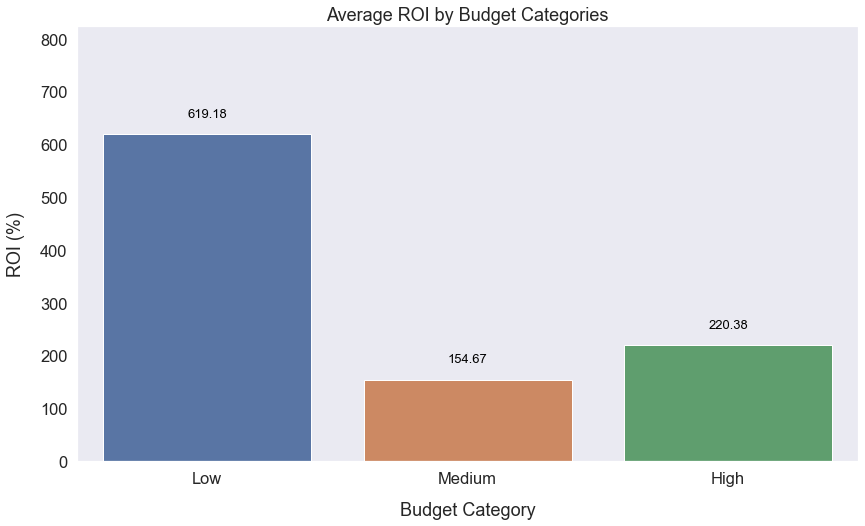

In [82]:
sns.set_theme(context='notebook', style='dark', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc={'figure.figsize':(14,8)})



roi_bar = sns.barplot(x ='budget_groups', y = 'roi', data = tn_df, errwidth=0)

ax = roi_bar

ax.set_xlabel("Budget Category", rotation=0, labelpad=15)
ax.set_ylabel("ROI (%)", rotation=90, labelpad=15)
ax.set_title('Average ROI by Budget Categories')

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                textcoords='offset points');


The return on investment (ROI) is highest for low-budget films

# Other Scratch Work

## First Dataset Explorations:

### 1. "Rotten Tomatoes: Movie Info" Dataset

#### Main Takeaways:

##### Potential Predictor Variables
 1. MPAA Rating
 2. Genre
 3. Director
 4. Writer
 5. Theater Date (month released/time of month?)
 6. Runtime

##### Potential Outcome Variable
 1. Box_Office
 - Seems to be 1st weekend collection in US only? 
 - Probably not the best source to use
 
 2. Currency (only USD, useless)
 
##### Connector Variables
 1. id

#### Methodology

###### Import Data & View First 5 Rows

In [ ]:
rt_df.head()

###### Examine Columns/Variables of Interest

In [ ]:
rt_movie_info_df.info()

- Movie title is not included in this database, just ID.
 - So much missing data!!! (more on that below)

###### Missing Data: 10% Rule

In [ ]:
# Columns that have more than 10% of data missing:

print(1560*10/100) 

#156 Missing, 1404 Present

((rt_df.isna().sum())>156)

#Director, Writer, Theater_Date, DVD_Date, Currency, Box_Office, Studio

###### Descriptive Statistics

- Numeric variables: Box_Office, Runtime
- Categorical variables: the rest
- Theater_Date --> convert to DateTime if interesting

In [ ]:
rt_df['rating'].value_counts(normalize = True)* 100

In [ ]:
rt_df['genre'].value_counts(normalize = True) * 100

#299 different Genres! will have to parse through & convert to lists to use?

In [ ]:
rt_df['runtime'].value_counts()

# need to get rid of minutes, need to convert to int

In [ ]:
#Unique movies in dataset:

len(rt_df['id'].value_counts())

<br>

### 2. Rotten Tomatoes: Reviews Dataset

##### Dataset Info

In [ ]:



rt_movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')

rt_review_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding = 'unicode_escape', error_bad_lines=False)

rt_review_df.info()

##### Missing Data 10% rule:

In [ ]:
#10%: Missing data > 5443

((rt_review_df.isna().sum())>5443)

# Rating

##### How many unique movies are represented in this dataset?

In [ ]:
len(rt_review_df['id'].value_counts()) # 1135

- 1135 movies in this dataset vs. 1560 movies in "Movie Info" dataset?

- Missing review data on **325 movies**?

##### Descriptive Statistics

**Categorical Variables**: Fresh, Critic, Top_Critic

**Numeric Variables**: Rating (needs to be converted to int & standardized)

In [ ]:
rt_rev_df['rating'].value_counts()

In [ ]:
rt_rev_df['fresh'].value_counts()

In [ ]:
rt_rev_df['top_critic'].value_counts()

<br>

### 3. The Numbers Database

#### Main Takeaways

##### Potential Variables of Interest:
1. Release Date
2. Production Budget

##### Outcome Variables:
1. Domestic Gross
2. Worldwide Gross
3. Production Budget (if we want to look at net profits)

##### Connector Variables:
1. Movie Name

##### Variable Definitions:
1. Domestic Gross = total box office collections in US & Canada
2. Worldwide Gross = total box office collections everywhere
3. Net Profit (to be calculated) = Worldwide Gross - Production Budget

#### Methodology

##### Imports, First 5 Rows & Last 5 Rows

In [ ]:

tn_df.head()

In [ ]:
tn_df.tail()

###### Questions:
1. How does a movie gross nothing? Should we exclude?

##### Dataset Info

In [ ]:
tn_df.info()

- No missing data! 

- All **object type**

## Takeaways from Tues AM Meeting

- First priority: The Numbers Dataset
- Second priority: Rotten Tomatoes (too messy; similar data available in The Movies Database)

#### Next Steps (using The Numbers Dataset)

1. Explore if ID can be used as a connecting variable
2. Convert Production_Budget, Domestic_Gross, Worldwide_Gross to int
3. Calculate Net Profit
4. **Scatter Plot: Production Budget vs. Net Profit **
5. Convert Release_Date to DateTime Object
6. Calculate Quarter, Month, Time of Month (early/mid/late?)
7. Explore correlations between time & profit

### 1. Exploring ID Further: Is this a connecting variable?

In [ ]:
tn_df['id'].value_counts()

 - ID not a unique identifier, seems to just be the last 2 digits of the original index

In [ ]:
tn_df.describe()

### 4. Scatterplot: Production Budget by Worldwide Net Profit

## Comparing the Average Profit for Low, Medium & High Budget Films:

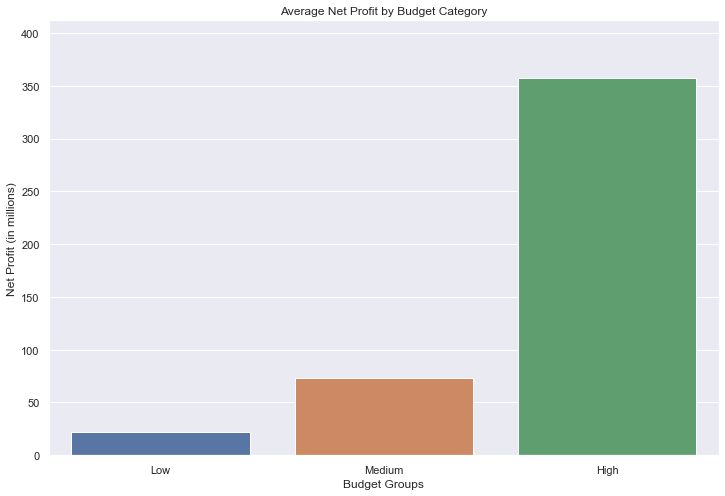

In [29]:
sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(data = tn_df, x = tn_df['budget_groups'], y = tn_df['profit_mils'], errwidth=0).set(xlabel = 'Budget Groups', ylabel ='Net Profit (in millions)', title='Average Net Profit by Budget Category');

